In [25]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [27]:
candidates = ["ALCKMIN","BOLSONARO","BOULOS","CIRO","LULA","MANUELA","MARINA","TEMER"]
total = 0
for i in candidates:
    c = pd.read_csv(i+'_location.csv',sep=',', encoding='utf-8')
    total += c.shape[0]
# times = {}

/home/alysson/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
print(total)

1960074


In [37]:
path = "../dataset/DATASET/"
for c in candidates:
    files = os.listdir(path+c)
#     files.remove('.git')
    for f in files:
        with open(path+c+"/"+f, 'r') as file:
            try:
                dt = json.load(file)
                times[dt['id']] = dt['created_at']
            except Exception as e:
                print(e)
                print(file)

len(times.keys())
# 2539216


In [3]:
with open('result.json', 'r') as file:
    t = json.load(file)
    print(t.keys())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [4]:
def getDate(id):
    try:
        int(id)
    except ValueError:
        return None
    date = t[str(id)]
    date = date.split(' ') #weekday month day hour minute
    return date[1]+' '+date[2] +' '+date[3].split(':')[0]

# print(getDate(986787249667891200))
print(getDate("986787249667891200"))

Apr 19 02


In [7]:
for c in candidates:
    print(c)
    ds = pd.read_csv(c+"_location.csv",sep=',',encoding='utf-8')
#     ds = ds.drop(['Unnamed: 0'], axis=1)
    ds['created_at'] = ds.id.apply(lambda id: getDate(id))
    ds.to_csv(c+"_location.csv",sep=',',encoding='utf-8', index=False)

ALCKMIN
BOLSONARO


/home/alysson/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


BOULOS
CIRO
LULA
MANUELA
MARINA
TEMER


In [83]:
d = pd.read_csv("BOLSONARO_location.csv",sep=',',encoding='utf-8')
a = list(d.groupby('created_at')['id'].count().index)
# 23 de Março à 29 de Abril
a

/home/alysson/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



['Apr 06 21',
 'Apr 06 22',
 'Apr 06 23',
 'Apr 07 00',
 'Apr 07 01',
 'Apr 07 02',
 'Apr 07 03',
 'Apr 07 04',
 'Apr 07 05',
 'Apr 07 06',
 'Apr 07 07',
 'Apr 07 08',
 'Apr 07 09',
 'Apr 07 10',
 'Apr 07 11',
 'Apr 07 12',
 'Apr 07 17',
 'Apr 07 18',
 'Apr 07 19',
 'Apr 07 20',
 'Apr 07 21',
 'Apr 07 22',
 'Apr 07 23',
 'Apr 08 00',
 'Apr 08 01',
 'Apr 08 02',
 'Apr 12 22',
 'Apr 12 23',
 'Apr 13 00',
 'Apr 19 02',
 'Apr 19 03',
 'Apr 19 04',
 'Apr 19 05',
 'Apr 19 06',
 'Apr 19 07',
 'Apr 19 08',
 'Apr 19 09',
 'Apr 19 10',
 'Apr 19 11',
 'Apr 19 12',
 'Apr 19 13',
 'Apr 19 14',
 'Apr 19 15',
 'Apr 19 16',
 'Apr 19 17',
 'Apr 19 18',
 'Apr 19 19',
 'Apr 19 20',
 'Apr 19 21',
 'Apr 19 22',
 'Apr 19 23',
 'Apr 20 00',
 'Apr 20 01',
 'Apr 20 02',
 'Apr 20 03',
 'Apr 20 04',
 'Apr 20 05',
 'Apr 20 06',
 'Apr 20 07',
 'Apr 20 08',
 'Apr 20 09',
 'Apr 20 10',
 'Apr 20 11',
 'Apr 20 12',
 'Apr 20 13',
 'Apr 20 14',
 'Apr 20 15',
 'Apr 20 16',
 'Apr 20 17',
 'Apr 20 18',
 'Apr 20 19',
 'Apr 

---------------------

## Charts 

* 0 = Rejeição
* 1 = Neutro
* 2 = Aprovação

In [84]:
dt = pd.read_csv("BOLSONARO_location.csv",sep=',',encoding='utf-8')

/home/alysson/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [85]:
n = []
for i,j in zip(dt[dt.classification == 0].groupby('created_at')['id'].count().index, dt[dt.classification == 0].groupby('created_at')['id'].count().values):
    n.append((i,j))

p = []
for i,j in zip(dt[dt.classification == 2].groupby('created_at')['id'].count().index, dt[dt.classification == 2].groupby('created_at')['id'].count().values):
    p.append((i,j))

In [87]:
def sorting(l):
    def comparator(x, y):    
        d1 = x[0].split(' ')
        d2 = y[0].split(' ')
        if d1[0] == d2[0]:
            if int(d1[1]) > int(d2[1]):
                return 1
            elif int(d1[1]) < int(d2[1]):
                return -1
            else:
                if int(d1[1]) == int(d2[1]):
                    return int(d1[2]) - int(d2[2])
        elif d1[0] == 'Mar' and d2[0] == 'Apr':
            return -1
        elif d1[0] == 'Apr' and d2[0] == 'Mar':
            return 1
            #return x - y # x > y:1, x=y:0, x < y:-1

    for i in range(len(l)):
        for j in range(i+1,len(l)):
            if comparator(l[i],l[j]) == 1:
                aux = l[i]
                l[i] = l[j]
                l[j] = aux
sorting(n)
sorting(p)

In [88]:
positives = [ i[1] for i in p]
positives = list(map(math.log,positives))
negatives = [ i[1] for i in n]
negatives = list(map(math.log,negatives))
times = [ i[0] for i in p]

In [89]:
if len(positives) > len(negatives):
    positives = positives[0:len(negatives)]
elif len(positives) < len(negatives):
    negatives = negatives[0:len(positives)]
times = times[0:len(positives)]

In [90]:
print(len(positives))
print(len(negatives))
print(len(times))

299
299
299


In [91]:
timesp = []
for i in range(len(times)):
    if i % 12 == 0:
        timesp.append(times[i]+'h')
    else:
        timesp.append('')

### Gráfico Ciro

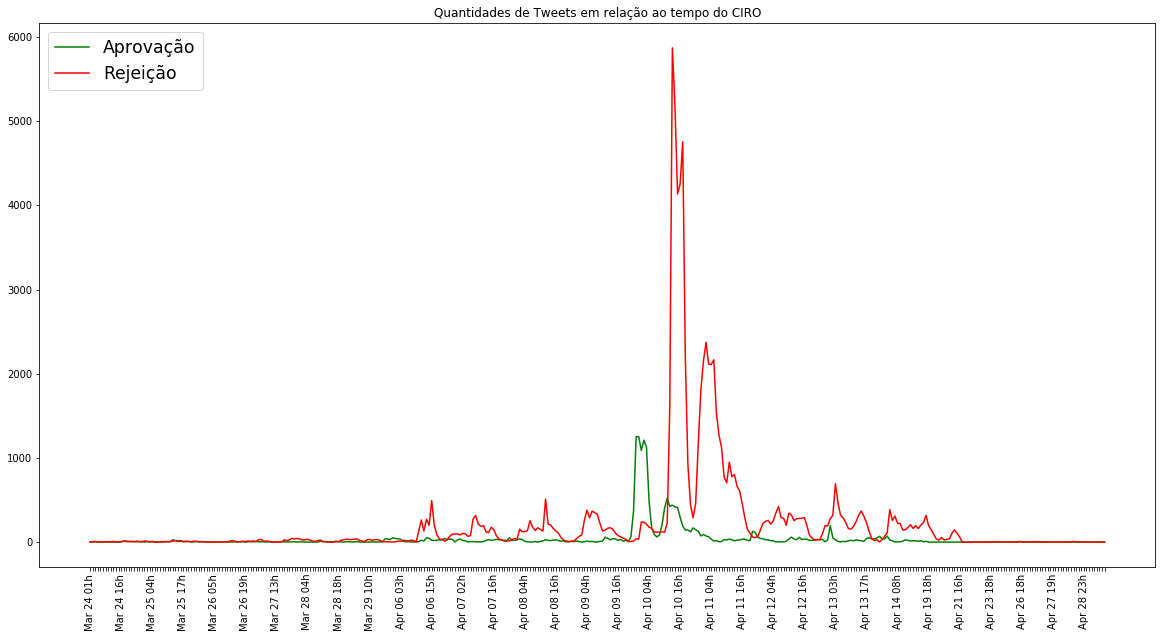

In [19]:
x = np.array(list(range(len(times))))
postives = np.array(positives)
negatives = np.array(negatives)
# my_xticks = times
my_xticks = timesp
plt.figure(figsize=(20,10))
plt.xticks(x, my_xticks,rotation=90)
plt.plot(x, positives,  markersize=12, color='green') #marker='o', markerfacecolor='green',
plt.plot(x, negatives,  markersize=12, color='red') #marker='o', markerfacecolor='red'
plt.title('Quantidades de Tweets em relação ao tempo do CIRO')
plt.legend(['Aprovação', 'Rejeição'], loc='upper left', fontsize='xx-large')
plt.show()

### Gráfico Lula

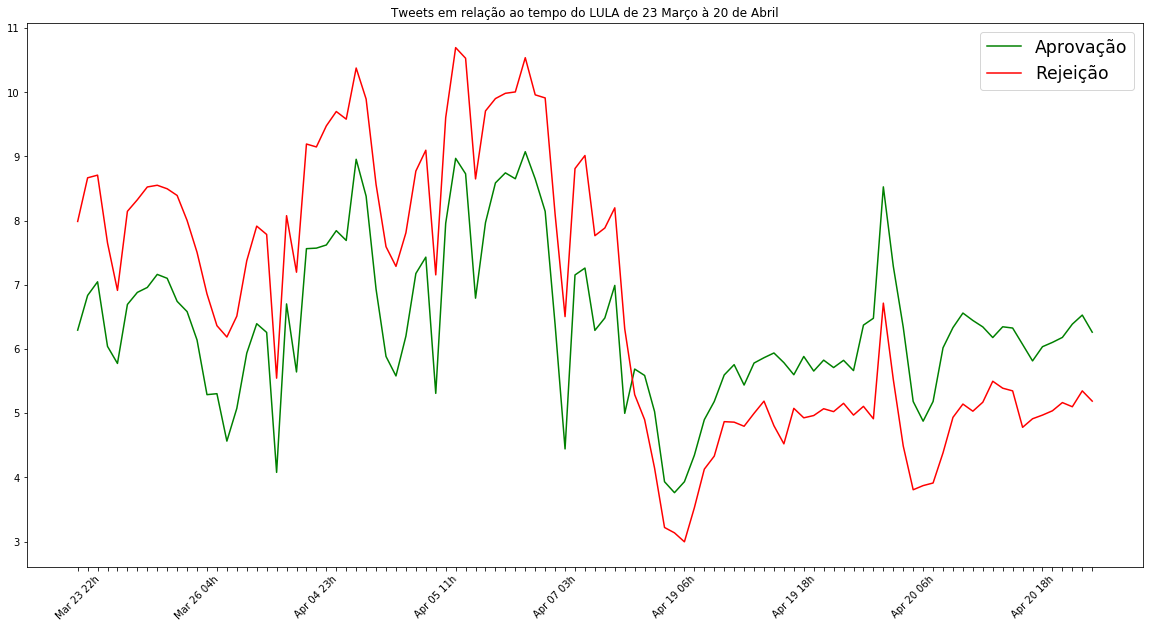

In [80]:
x = np.array(list(range(len(times))))
postives = np.array(positives)
negatives = np.array(negatives)
# my_xticks = times
my_xticks = timesp
plt.figure(figsize=(20,10))
plt.xticks(list(x)[0:math.floor(len(x)/3)], my_xticks[0:math.floor(len(my_xticks)/3)],rotation=45)
plt.plot(list(x)[0:math.floor(len(x)/3)], positives[0:math.floor(len(x)/3)],  markersize=12, color='green') #marker='o', markerfacecolor='green',
plt.plot(list(x)[0:math.floor(len(x)/3)], negatives[0:math.floor(len(x)/3)],  markersize=12, color='red') #marker='o', markerfacecolor='red'
plt.title('Tweets em relação ao tempo do LULA de 23 Março à 20 de Abril')
plt.legend(['Aprovação', 'Rejeição'], loc='upper right', fontsize='xx-large')
plt.show()

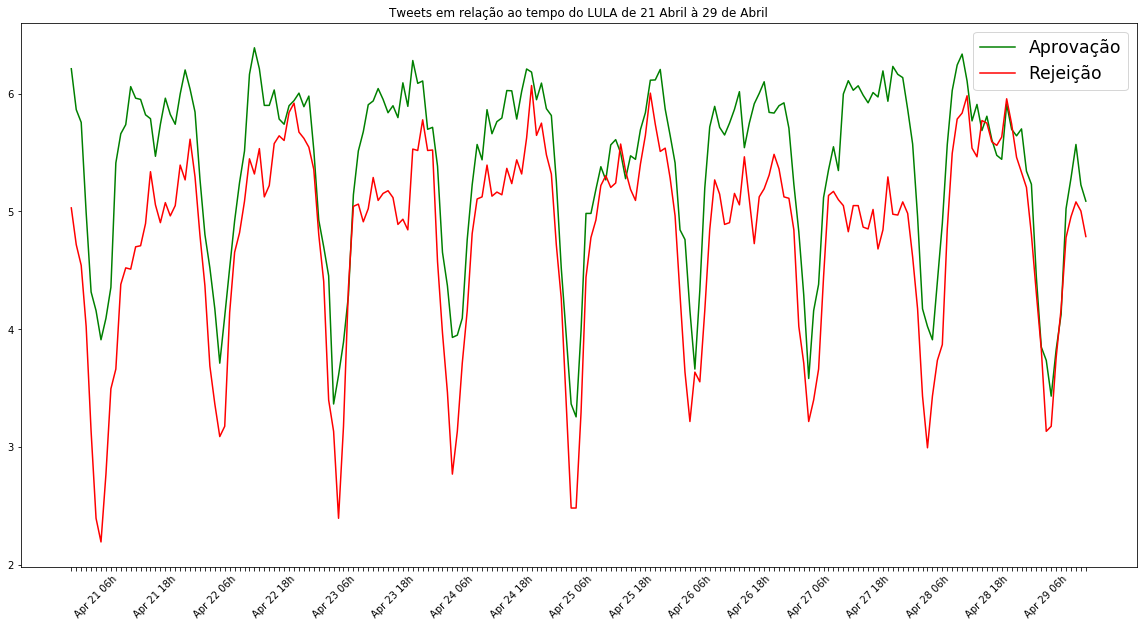

In [82]:
my_xticks = timesp
plt.figure(figsize=(20,10))
plt.xticks(list(x)[math.floor(len(x)/3):len(x)], my_xticks[math.floor(len(my_xticks)/3):len(x)],rotation=45)
plt.plot(list(x)[math.floor(len(x)/3):len(x)], positives[math.floor(len(x)/3):len(x)],  markersize=12, color='green') #marker='o', markerfacecolor='green',
plt.plot(list(x)[math.floor(len(x)/3):len(x)], negatives[math.floor(len(x)/3):len(x)],  markersize=12, color='red') #marker='o', markerfacecolor='red'
plt.title('Tweets em relação ao tempo do LULA de 21 Abril à 29 de Abril')
plt.legend(['Aprovação', 'Rejeição'], loc='upper right', fontsize='xx-large')
plt.show()

### Gráfico Bolsonaro

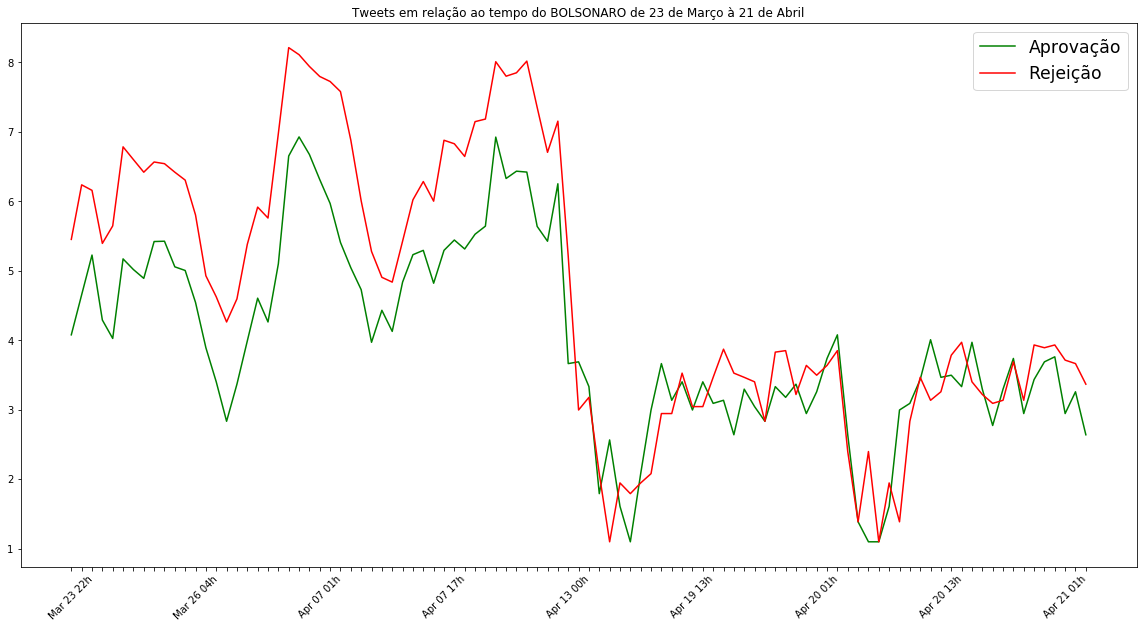

In [93]:
x = np.array(list(range(len(times))))
postives = np.array(positives)
negatives = np.array(negatives)
# my_xticks = times
my_xticks = timesp
plt.figure(figsize=(20,10))
plt.xticks(list(x)[0:math.floor(len(x)/3)], my_xticks[0:math.floor(len(my_xticks)/3)],rotation=45)
plt.plot(list(x)[0:math.floor(len(x)/3)], positives[0:math.floor(len(x)/3)],  markersize=12, color='green') #marker='o', markerfacecolor='green',
plt.plot(list(x)[0:math.floor(len(x)/3)], negatives[0:math.floor(len(x)/3)],  markersize=12, color='red') #marker='o', markerfacecolor='red'
plt.title('Tweets em relação ao tempo do BOLSONARO de 23 de Março à 21 de Abril')
plt.legend(['Aprovação', 'Rejeição'], loc='upper right', fontsize='xx-large')
plt.show()

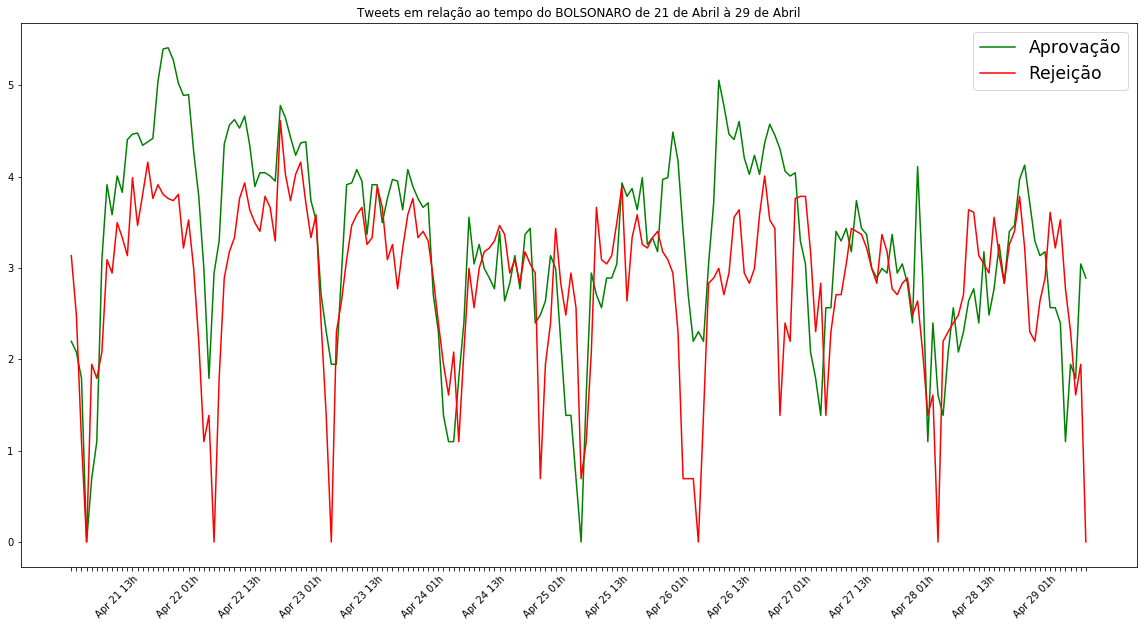

In [95]:
my_xticks = timesp
plt.figure(figsize=(20,10))
plt.xticks(list(x)[math.floor(len(x)/3):len(x)], my_xticks[math.floor(len(my_xticks)/3):len(x)],rotation=45)
plt.plot(list(x)[math.floor(len(x)/3):len(x)], positives[math.floor(len(x)/3):len(x)],  markersize=12, color='green') #marker='o', markerfacecolor='green',
plt.plot(list(x)[math.floor(len(x)/3):len(x)], negatives[math.floor(len(x)/3):len(x)],  markersize=12, color='red') #marker='o', markerfacecolor='red'
plt.title('Tweets em relação ao tempo do BOLSONARO de 21 de Abril à 29 de Abril')
plt.legend(['Aprovação', 'Rejeição'], loc='upper right', fontsize='xx-large')
plt.show()

### Gráfico Alckmin

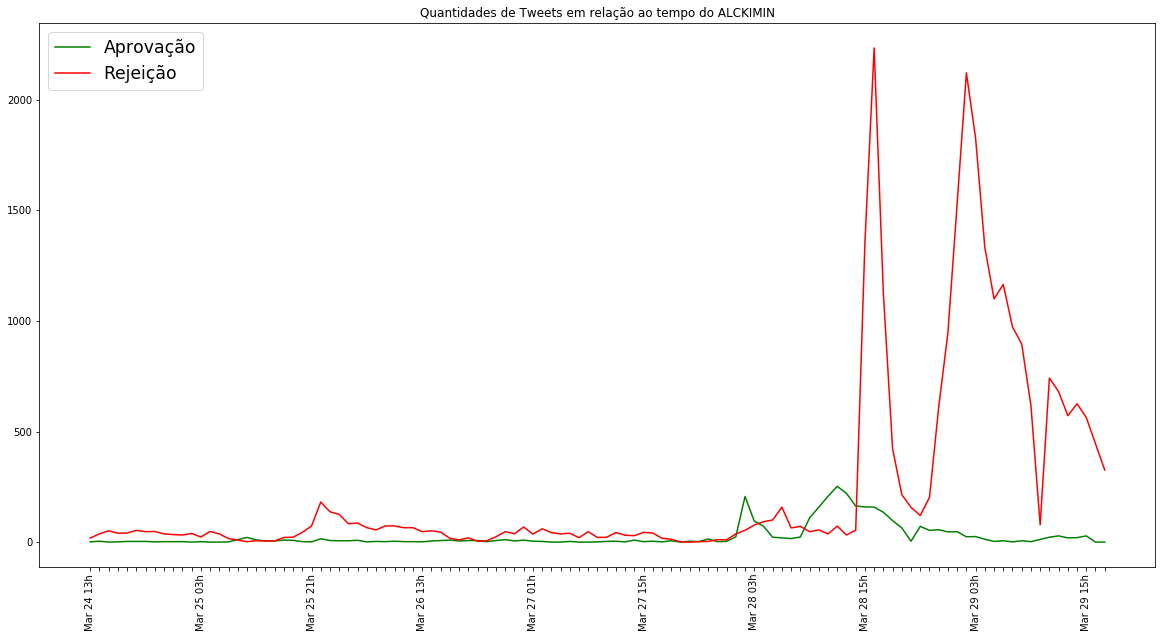

In [44]:
x = np.array(list(range(len(times))))
postives = np.array(positives)
negatives = np.array(negatives)
# my_xticks = times
my_xticks = timesp
plt.figure(figsize=(20,10))
plt.xticks(x, my_xticks,rotation=90)
plt.plot(x, positives,  markersize=12, color='green') #marker='o', markerfacecolor='green',
plt.plot(x, negatives,  markersize=12, color='red') #marker='o', markerfacecolor='red'
plt.title('Quantidades de Tweets em relação ao tempo do ALCKIMIN')
plt.legend(['Aprovação', 'Rejeição'], loc='upper left', fontsize='xx-large')
plt.show()

In [218]:
dl = pd.read_csv("LULA_location.csv",sep=',',encoding='utf-8')
da = pd.read_csv("ALCKMIN_location.csv",sep=',',encoding='utf-8')

In [230]:
p_lula = []
for i,j in zip(dl[dl.classification == 2].groupby('created_at')['id'].count().index, dl[dl.classification == 2].groupby('created_at')['id'].count().values):
    p_lula.append((i,j))

p_alck = []
for i,j in zip(dc[dc.classification == 0].groupby('created_at')['id'].count().index, dc[dc.classification == 0].groupby('created_at')['id'].count().values):
    p_alck.append((i,j))

In [6]:
def sorting(l):
    def comparator(x, y):    
        d1 = x[0].split(' ')
        d2 = y[0].split(' ')
        if d1[0] == d2[0]:
            if int(d1[1]) > int(d2[1]):
                return 1
            elif int(d1[1]) < int(d2[1]):
                return -1
            else:
                if int(d1[1]) == int(d2[1]):
                    return int(d1[2]) - int(d2[2])
        elif d1[0] == 'Mar' and d2[0] == 'Apr':
            return -1
        elif d1[0] == 'Apr' and d2[0] == 'Mar':
            return 1
            #return x - y # x > y:1, x=y:0, x < y:-1

    for i in range(len(l)):
        for j in range(i+1,len(l)):
            if comparator(l[i],l[j]) == 1:
                aux = l[i]
                l[i] = l[j]
                l[j] = aux
# sorting(p_lula)
# sorting(p_alck)

In [9]:
def intersection(a,b):
    c,d = [],[]
    e,f = None, None
    if len(a) > len(b):
        e,f = a,b
    elif len(b) > len(a):
        e,f = b,a
    else:
        e,f = a,b
    
    for i in e:
        for j in f:
            if i[0] == j[0]:
                c.append(i)
                d.append(j)
    return c,d

In [233]:
lula,alck = intersection(p_lula,p_alck)

In [234]:
print(len(lula))
print(len(alck))

172
172


In [238]:
l = [ i[1] for i in lula]
l = list(map(math.log,l))
a = [ i[1] for i in alck]
a = list(map(math.log,a))
times = [ i[0] for i in lula]

In [239]:
timesp = []
for i in range(len(times)):
    if i % 7 == 0:
        timesp.append(times[i]+'h')
    else:
        timesp.append('')

### Gráfico de intercessão entre Lula e Ciro

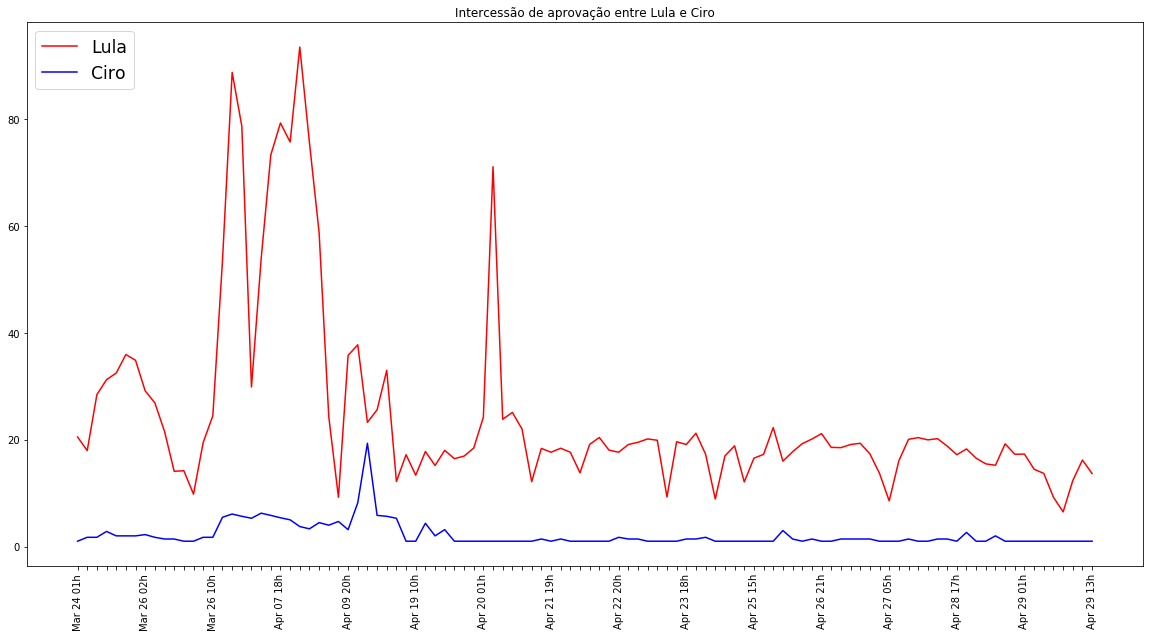

In [87]:
x = np.array(list(range(len(times))))
a_lula = np.array(l)
a_ciro = np.array(c)
# my_xticks = times
my_xticks = timesp
plt.figure(figsize=(20,10))
plt.xticks(x, my_xticks,rotation=90)
plt.plot(x, a_lula,  markersize=12, color='red') #marker='o', markerfacecolor='green',
plt.plot(x, a_ciro,  markersize=12, color='blue') #marker='o', markerfacecolor='red'
plt.title('Intercessão de aprovação entre Lula e Ciro')
plt.legend(['Lula', 'Ciro'], loc='upper left', fontsize='xx-large')
plt.show()
#Aplicando a raiz quadrada nos valores 

### Gráfico de intercessão entre Lula e Alckmin

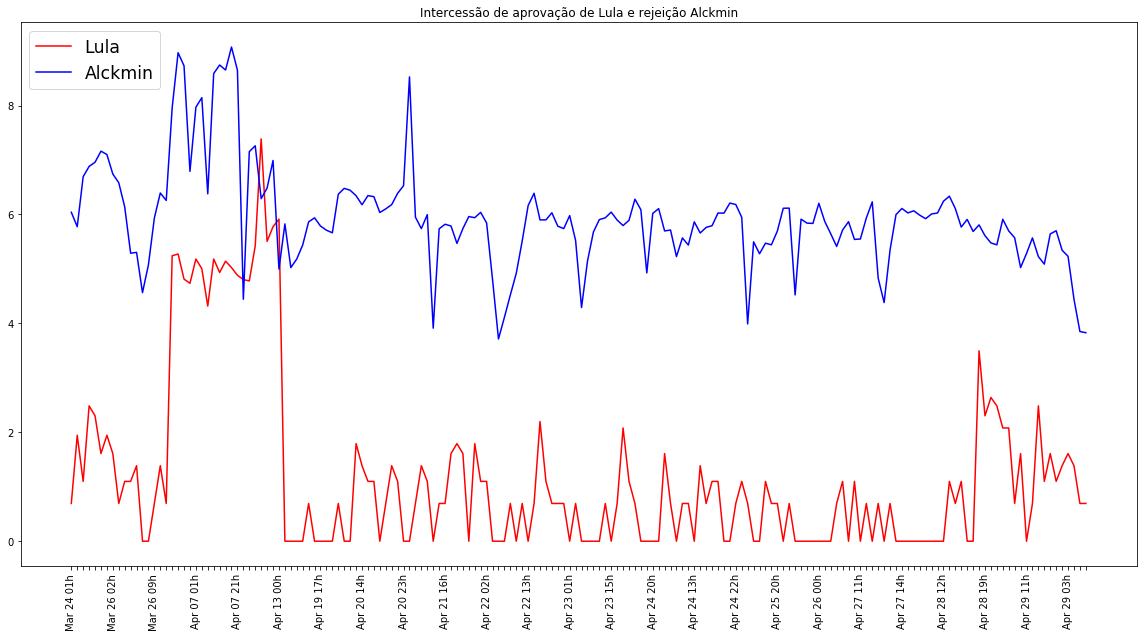

In [240]:
x = np.array(list(range(len(times))))
a_lula = np.array(l)
a_alck = np.array(a)
my_xticks = timesp
plt.figure(figsize=(20,10))
plt.xticks(x, my_xticks,rotation=90)
plt.plot(x, a_lula,  markersize=12, color='red') #marker='o', markerfacecolor='green',
plt.plot(x, a_alck,  markersize=12, color='blue') #marker='o', markerfacecolor='red'
plt.title('Intercessão de aprovação de Lula e rejeição Alckmin')
plt.legend(['Lula','Alckmin'], loc='upper left', fontsize='xx-large')
plt.show()

### Gráfico com intercessão entre Bolsonaro e Lula

In [2]:
dl = pd.read_csv("LULA_location.csv",sep=',',encoding='utf-8')
db = pd.read_csv("BOLSONARO_location.csv",sep=',',encoding='utf-8')

/home/alysson/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
p_lula = []
for i,j in zip(dl[dl.classification == 0].groupby('created_at')['id'].count().index, dl[dl.classification == 0].groupby('created_at')['id'].count().values):
    p_lula.append((i,j))

p_bolso = []
for i,j in zip(db[db.classification == 2].groupby('created_at')['id'].count().index, db[db.classification == 2].groupby('created_at')['id'].count().values):
    p_bolso.append((i,j))

In [30]:
sorting(p_lula)
sorting(p_bolso)

In [31]:
lula,bolso = intersection(p_lula,p_bolso)

In [32]:
print(len(lula))
print(len(bolso))

288
288


In [33]:
l = [ i[1] for i in lula]
l = list(map(math.log,l))
b = [ i[1] for i in bolso]
b = list(map(math.log,b))
times = [ i[0] for i in lula]

In [34]:
timesp = []
for i in range(len(times)):
    if i % 7 == 0:
        timesp.append(times[i]+'h')
    else:
        timesp.append('')

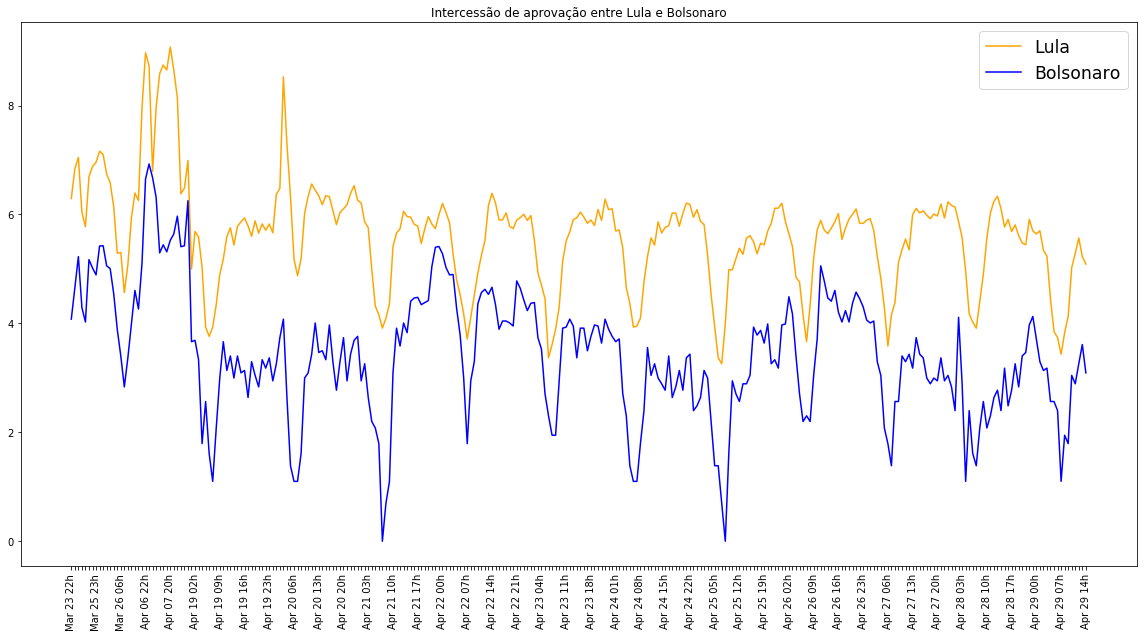

In [14]:
x = np.array(list(range(len(times))))
a_lula = np.array(l)
a_bolso = np.array(b)
# my_xticks = times
my_xticks = timesp
plt.figure(figsize=(20,10))
plt.xticks(x, my_xticks,rotation=90)
plt.plot(x, a_lula,  markersize=12, color='orange') #marker='o', markerfacecolor='green',
plt.plot(x, a_bolso,  markersize=12, color='blue') #marker='o', markerfacecolor='red'
plt.title('Intercessão de aprovação entre Lula e Bolsonaro')
plt.legend(['Lula', 'Bolsonaro'], loc='upper right', fontsize='xx-large')
plt.show()

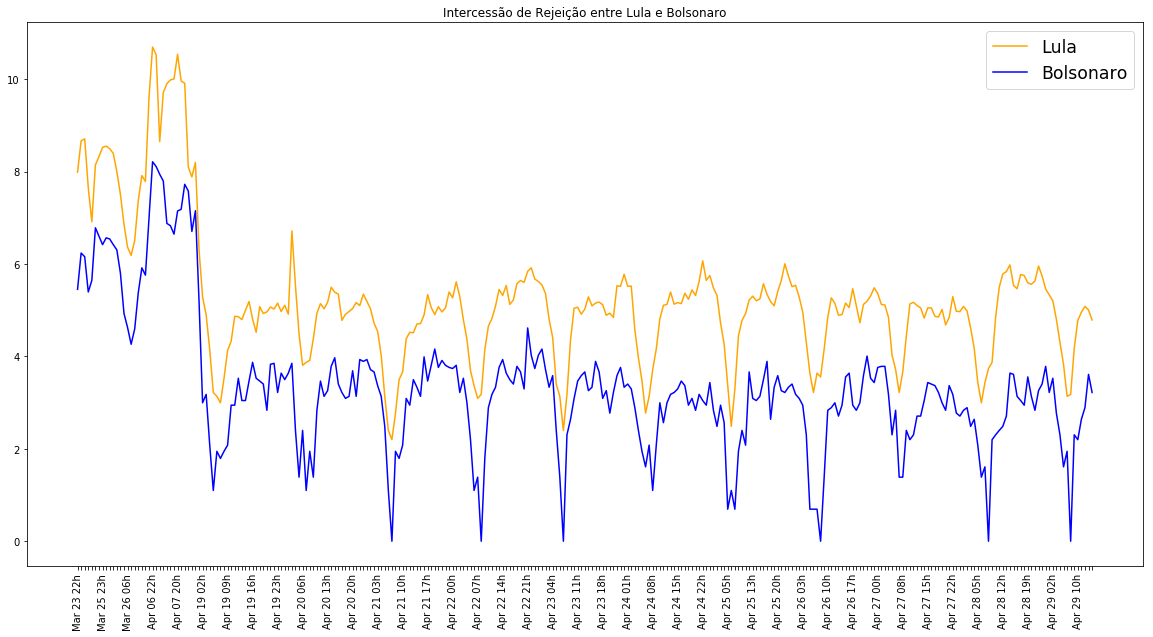

In [21]:
x = np.array(list(range(len(times))))
a_lula = np.array(l)
a_bolso = np.array(b)
# my_xticks = times
my_xticks = timesp
plt.figure(figsize=(20,10))
plt.xticks(x, my_xticks,rotation=90)
plt.plot(x, a_lula,  markersize=12, color='orange') #marker='o', markerfacecolor='green',
plt.plot(x, a_bolso,  markersize=12, color='blue') #marker='o', markerfacecolor='red'
plt.title('Intercessão de Rejeição entre Lula e Bolsonaro')
plt.legend(['Lula', 'Bolsonaro'], loc='upper right', fontsize='xx-large')
plt.show()

### Gráfico de intecessão entre aprovação de Lula e rejeição de Bolsonaro

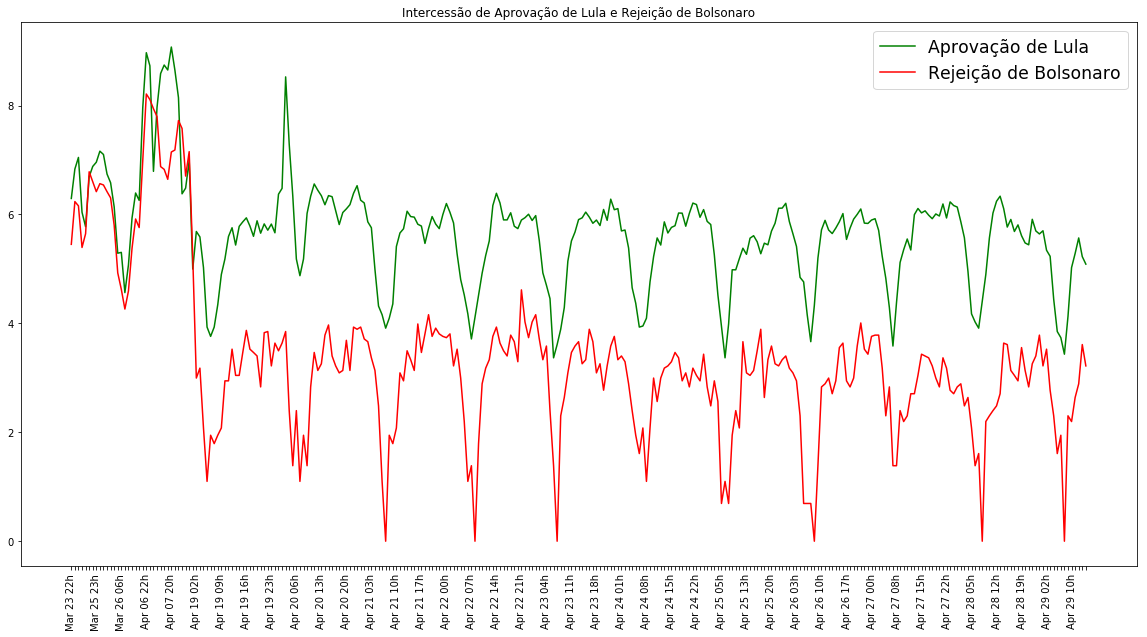

In [28]:
x = np.array(list(range(len(times))))
a_lula = np.array(l)
a_bolso = np.array(b)
# my_xticks = times
my_xticks = timesp
plt.figure(figsize=(20,10))
plt.xticks(x, my_xticks,rotation=90)
plt.plot(x, a_lula,  markersize=12, color='green') #marker='o', markerfacecolor='green',
plt.plot(x, a_bolso,  markersize=12, color='red') #marker='o', markerfacecolor='red'
plt.title('Intercessão de Aprovação de Lula e Rejeição de Bolsonaro')
plt.legend(['Aprovação de Lula', 'Rejeição de Bolsonaro'], loc='upper right', fontsize='xx-large')
plt.show()

### Gráfico de intecessão entre Rejeição de Lula e Aprovação de Bolsonaro

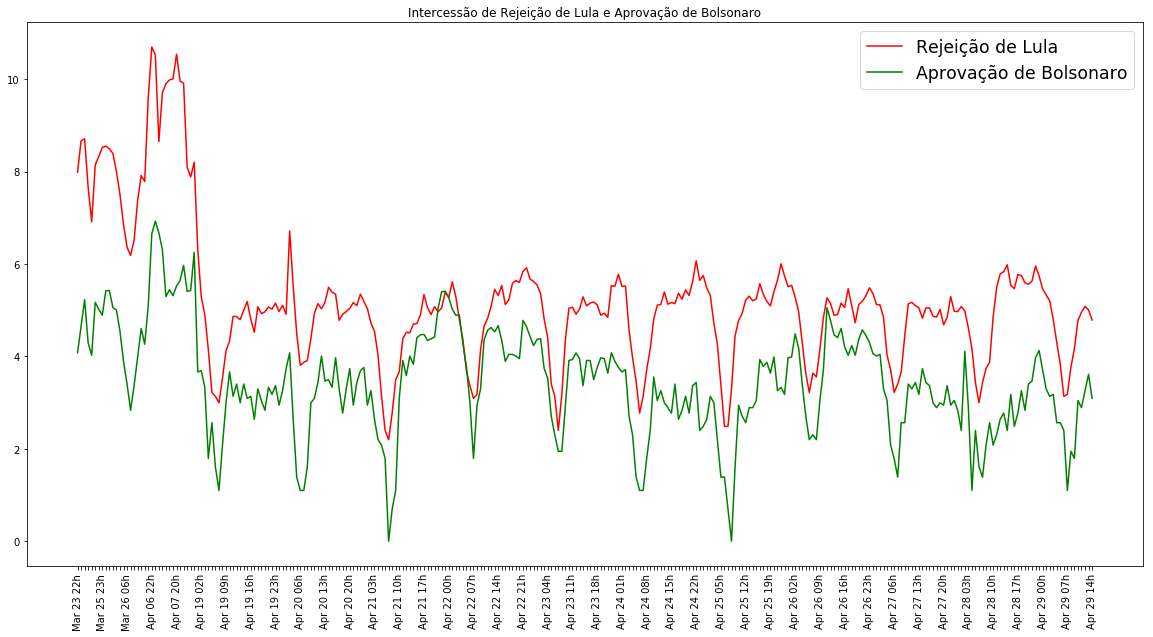

In [35]:
x = np.array(list(range(len(times))))
a_lula = np.array(l)
a_bolso = np.array(b)
# my_xticks = times
my_xticks = timesp
plt.figure(figsize=(20,10))
plt.xticks(x, my_xticks,rotation=90)
plt.plot(x, a_lula,  markersize=12, color='red') #marker='o', markerfacecolor='green',
plt.plot(x, a_bolso,  markersize=12, color='green') #marker='o', markerfacecolor='red'
plt.title('Intercessão de Rejeição de Lula e Aprovação de Bolsonaro')
plt.legend(['Rejeição de Lula', 'Aprovação de Bolsonaro'], loc='upper right', fontsize='xx-large')
plt.show()